In [1]:
#!/usr/bin/python
import os
import pandas as pd
import asdf
import spectres
import pynorm
from pynorm.ios import read_inorm
from pynorm.aod import pyn_batch
from scipy.interpolate import interp1d
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
from scipy.signal import find_peaks
from scipy.signal import argrelextrema, argrelmax
from collections import OrderedDict
from functions_pyALF import *
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,FuncFormatter,
                               AutoMinorLocator)


In [2]:

# read in the atom data file
transition_library=pd.read_table('atomdata_updated_new.dat', sep='\s+',header=None,comment = "#")
transition_library=np.asarray(transition_library)

# create folder for images
if not os.path.exists('./test_images'):
    os.makedirs('./test_images')


qso = 'J121930+494052'
filein = '../Example/{0}.asdf'.format(qso)
plot_ions=['HI']
af = asdf.open(filein)
wave = np.asarray(af['wave'])
wave = np.array(wave, dtype="<f8")
flux = np.asarray(af['flux'])
flux = np.array(flux, dtype="<f8")
err = np.asarray(af['err'])
err = np.array(err, dtype="<f8")
d = {'WAVELENGTH':wave,'FLUX':flux,'ERROR':err}
spec=pd.DataFrame(data=d)
species=speciesinterest(plot_ions,transition_library,choose=None)
zem = af['zqso']
blue_limit, max_red = blue_red_limits(zem,spec['WAVELENGTH'],species,flag=1)
selected_spec = fluxselector(spec,blue_limit,max_red)

selected_spec['Rest-Wavelength']=selected_spec['WAVELENGTH']/(1.0+zem)
pr = absorptionlocator(selected_spec)
selected_spec = addvel2spec(selected_spec,species)



/Users/dazhi/Downloads/codeastro/pyALF/pyALF/functions_pyALF.py:826: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fst = spec.index[spec['tag'] & ~ spec['tag'].shift(1).fillna(False)]
/Users/dazhi/Downloads/codeastro/pyALF/pyALF/functions_pyALF.py:827: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lst = spec.index[spec['tag'] & ~ spec['tag'].shift(-1).fillna(False)]


In [3]:

pr_dict=OrderedDict()
for num,pr_i in enumerate(pr):
    
    z_window = OrderedDict()
    wave_window = selected_spec[pr_i[0]:pr_i[1]]['WAVELENGTH']
    for transition in species['HI']:
        z_window[transition] = (wave_window/species['HI'][transition][0]) - 1.0
    filtered_dictionary = filter_and_transform_dictionary(z_window, zem)
    pr_dict[num] = filtered_dictionary   


In [10]:
#for num,pr_i in enumerate(pr):
def pr_dict_creator(num, pr):
    z_window = OrderedDict()
    wave_window = selected_spec[pr_i[0]:pr_i[1]]['WAVELENGTH']
    for transition in species['HI']:
        z_window[transition] = (wave_window/species['HI'][transition][0]) - 1.0
    filtered_dictionary = filter_and_transform_dictionary(z_window, zem)
    pr_dict[num] = filtered_dictionary   

from multiprocessing import Pool

if __name__ == '__main__':
    pool = Pool(processes=4)
    pool.starmap(pr_dict_creator, [(num, pr_i) for num, pr_i in enumerate(pr)])
    print(pr_dict)

Process SpawnPoolWorker-29:
Traceback (most recent call last):
  File "/Users/dazhi/miniconda3/envs/pyALF/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/dazhi/miniconda3/envs/pyALF/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/dazhi/miniconda3/envs/pyALF/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/dazhi/miniconda3/envs/pyALF/lib/python3.10/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'pr_dict_creator' on <module '__main__' (built-in)>
Process SpawnPoolWorker-31:
Traceback (most recent call last):
  File "/Users/dazhi/miniconda3/envs/pyALF/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/dazhi/miniconda3/envs/pyALF/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*

KeyboardInterrupt: 

In [13]:
from pathlib import Path
print(Path(__file__).resolve())

NameError: name '__file__' is not defined

In [6]:
from pyALF_attempt import pyALF

kk = pyALF('random_qso','/Users/dazhi/Downloads/codeastro/pyALF/Example/J121930+494052.asdf','/Users/dazhi/Downloads/codeastro/pyALF/pyALF')

In [7]:
kk.overlappingbounds()

In [8]:
kk.resultlist()

In [9]:
kk.selected_res()

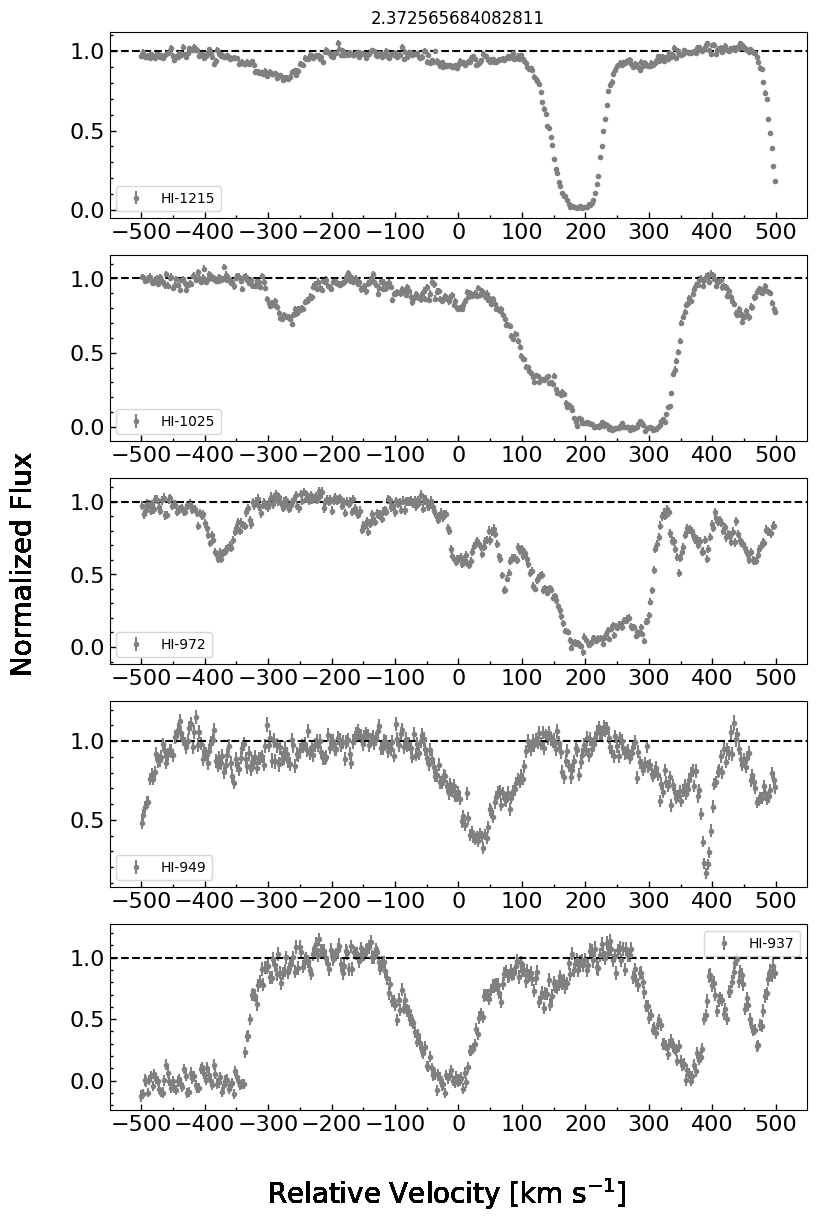

In [10]:
kk.pipeline()